![Picture for task](https://sun9-26.userapi.com/c857228/v857228183/1b40ca/DMP25MVnbLI.jpg)

__Задание 1.__ Доверительный интервал для математического ожидания СВ.

_1.1. В соответствии с вариантом сформировать выборку из 20 случайных чисел. Найти точечную оценку математического ожидания случайной величины._

Формула несмещенной оценки математического ожидания:

$$\bar{x}=\sum_{i=0}^{n}\frac{x_i}{n}$$

In [76]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [77]:
a = 1
b = 5
n = 20

In [78]:
x = sorted([random.uniform(a,b) for i in range(n)])
y = sorted([math.sqrt(value) for value in x])

mY = sum(y) / n
print(f"Точечная оценка мат. ожидания СВ y: {mY}")

Точечная оценка мат. ожидания СВ y: 1.5134268174944967


_1.2. Найти точечную оценку дисперсии случайной величины._

Формула несмещенной оценки дисперсии:

$$S^2_0=\frac{1}{n-1}\sum_{i=0}^{n}(x_i-\bar{x})^2$$

In [79]:
S = sum([(y[i] - mY)**2  for i in range(n)]) / (n - 1)
print(f"Точечная оценка дисперсии СВ y: {S}")

Точечная оценка дисперсии СВ y: 0.1402783080782118


_1.3. Найти доверительный интервал для оценки математического ожидания случайной величины для различных уровней значимости._

Уровни значимости $\gamma$: 0.9, 0.95, 0.98, 0.99, 0.999. По таблице Стьюдента определим значения $t_{\gamma, n-1}$ ($n-1=19$ степеней свободы) для всех уровней значимости: $t_{0.9, 19}=1.33,t_{0.95, 19}=1.729, t_{0.98, 19}=2.205, t_{0.99, 19}=2.539, t_{0.999, 19}=3.579$

Построим доверительный интервал для каждого $t$:

$$\bar{x}-\frac{s\cdot t_{\gamma, n-1}}{\sqrt{n-1}}\le m_x <\bar{x}+\frac{s\cdot t_{\gamma, n-1}}{\sqrt{n-1}}$$

In [80]:
from scipy.stats import t

gamma = [0.90, 0.95, 0.98, 0.99, 0.999]
delta = []

for i in range(len(gamma)):
    t_ = t.ppf(gamma[i], n - 1)
    interval =  math.sqrt(S) * t_ / math.sqrt(n - 1)
    y1, y2 = mY - interval, mY + interval
    delta.append(y2 - y1)
    print(f"\nДоверительный интервал для мат. ожидания с уровнем значимости gamma ={gamma[i]}\n{y1} < m[y] < {y2}")


Доверительный интервал для мат. ожидания с уровнем значимости gamma =0.9
1.399342055290298 < m[y] < 1.6275115796986954

Доверительный интервал для мат. ожидания с уровнем значимости gamma =0.95
1.364851450728367 < m[y] < 1.6620021842606263

Доверительный интервал для мат. ожидания с уровнем значимости gamma =0.98
1.323988325775638 < m[y] < 1.7028653092133554

Доверительный интервал для мат. ожидания с уровнем значимости gamma =0.99
1.2952222678328902 < m[y] < 1.7316313671561032

Доверительный интервал для мат. ожидания с уровнем значимости gamma =0.999
1.2058676258160639 < m[y] < 1.8209860091729295


 _1.4. Построить график зависимости величины доверительного интервала от уровня значимости._

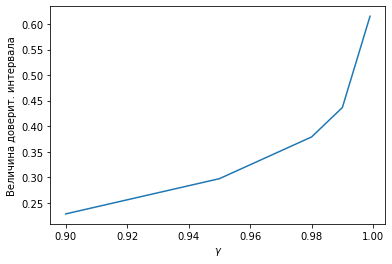

In [81]:
plt.plot(gamma, delta)
plt.xlabel("$\gamma$")
plt.ylabel("Величина доверит. интервала")
plt.show()

__Вывод:__ При фиксированном объеме выборки чем больше $\gamma$, тем шире границы доверительного интервала и тем больше ошибка в оценке мат. ожидания.

_1.5. Найти теоретическое значение дисперсии случайной величины по известной плотности распределения ( задание 2, п.3)._

Теоретическая функция распределения имеет вид:
$$ F(x) = \begin{cases}
0, x < 0, \\
\frac {x^2}{4} - \frac{1}{4}, x \in [1,\sqrt{5}],\\
1, x > \sqrt{5} \\
\end{cases}
$$
Теоретическая плотность распределения имеет вид:
$$ f(x)= \frac {x}{2}, x \in [1, \sqrt{5}] $$

$$M(X) = \int_{-\infty}^\infty x \cdot f(x)dx = \int_{1}^{ \sqrt{5}}  \frac {x^2}{2} dx = \frac {1}{2}\cdot {{x^3} \over {3}}\bigg|_1^\sqrt{5} $$
$$M(X^2) = \int_{-\infty}^\infty x^2 \cdot f(x)dx = \int_{1}^{ \sqrt{5}}  \frac {x^3}{2} dx  = \frac {1}{2}\cdot {{x^4} \over {4}}\bigg|_1^\sqrt{5} $$

$$D(X) = M(X^2) - M^2(X)$$

In [82]:
mx = 1/2 * ((math.sqrt(5) ** 3 - 1) / 3)
mx2 = 1/2 * ((math.sqrt(5)** 4 - 1) / 4)

Dx = mx2 - mx**2
print("Теоретическое значение дисперсии:", Dx)

Теоретическое значение дисперсии: 0.12112999374994082


_1.6. Найти доверительный интервал для оценки математического ожидания случайной величины при известной дисперсии для различных уровней значимости._

Формула доверительного интервала для математического ожидания при известной дисперсии:

$$\bar{x}-\frac{\sigma \cdot t_{\gamma, n-1}}{\sqrt{n-1}}\le m_x <\bar{x}+\frac{s\cdot t_{\gamma, n-1}}{\sqrt{n-1}}$$

In [83]:
sigma = math.sqrt(Dx)
delta_t = []

for i in range(len(gamma)):
    t_ = t.ppf(gamma[i], n - 1)
    interval =  sigma * t_ / math.sqrt(n - 1)
    y1, y2 = mY - interval, mY + interval
    delta_t.append(y2 - y1)
    print("\nДоверительный интервал для мат. ожидания при известной дисперсии с уровнем значимости gamma =", gamma[i], "\n", y1, "< m[y] <", y2)


Доверительный интервал для мат. ожидания при известной дисперсии с уровнем значимости gamma = 0.9 
 1.4074140360133223 < m[y] < 1.6194395989756711

Доверительный интервал для мат. ожидания при известной дисперсии с уровнем значимости gamma = 0.95 
 1.3753637879877978 < m[y] < 1.6514898470011956

Доверительный интервал для мат. ожидания при известной дисперсии с уровнем значимости gamma = 0.98 
 1.3373919024129495 < m[y] < 1.689461732576044

Доверительный интервал для мат. ожидания при известной дисперсии с уровнем значимости gamma = 0.99 
 1.310661165057325 < m[y] < 1.7161924699316684

Доверительный интервал для мат. ожидания при известной дисперсии с уровнем значимости gamma = 0.999 
 1.227628742887717 < m[y] < 1.7992248921012763


 _1.7. Построить график зависимости величины доверительного интервала от уровня значимости._

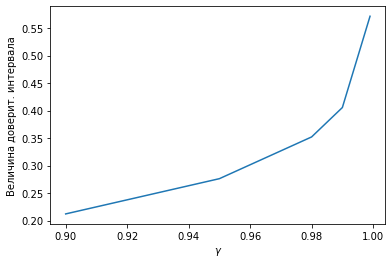

In [84]:
plt.plot(gamma, delta_t)
plt.xlabel("$\gamma$")
plt.ylabel("Величина доверит. интервала")
plt.show()

_1.8. Сравнить результаты, полученные по п.п. 1.4, 1.7._

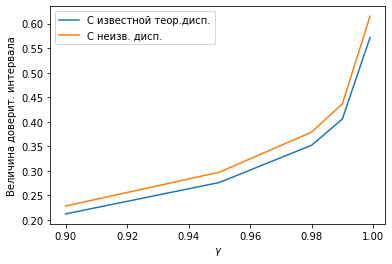

In [85]:
plt.plot(gamma, delta_t, label = "С известной теор.дисп.")
plt.plot(gamma, delta, label = "С неизв. дисп.")
plt.xlabel("$\gamma$")
plt.ylabel("Величина доверит. интервала")
plt.legend()
plt.show()

_1.9. Повторить п.п. 1.2 – 1.8. для различного объема выборки: n = 30, 50, 70, 100, 150._

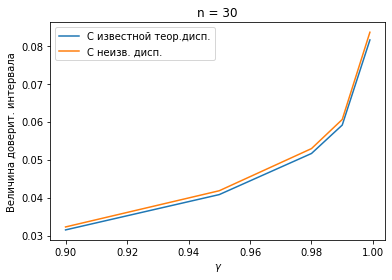

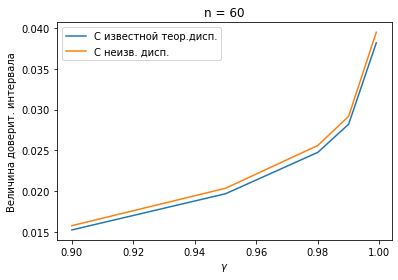

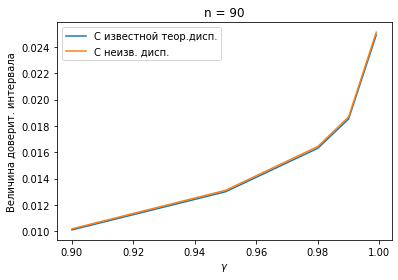

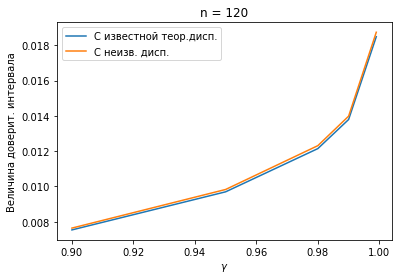

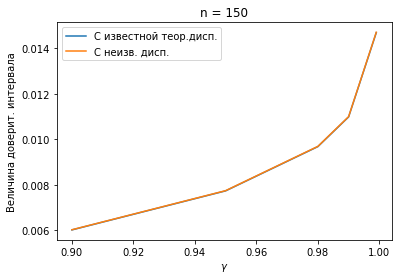

In [86]:
from scipy.stats import t
n_value = [30, 60, 90, 120, 150]
all_delta = []

for j in range (len(n_value)):
    
    # формируем выборку
    x = sorted([random.uniform(a,b) for i in range(n_value[j])])
    y = sorted([math.sqrt(value) for value in x])

    # находим точечную оценку математического ожидания СВ - mY
    mY = sum(y) / n_value[j]
    
    # находим точечную несмещенную оценку дисперсии СВ - Dx
    S = sum([(y[i] - mY)**2  for i in range(n_value[j])]) / (n_value[j] - 1)
    
    #с неизв. дисперсией
    delta = []
    for i in range(len(gamma)):
        t_ = t.ppf(gamma[i], n_value[j] - 1)
        interval =  math.sqrt(S) * t_ / (n_value[j] - 1)
        y1, y2 = mY - interval, mY + interval
        delta.append(y2 - y1)
    all_delta.append(delta)
    
    # с известной теор. дисперсией
    delta_t = []
    for i in range(len(gamma)):
        t_ = t.ppf(gamma[i], n_value[j] - 1)
        interval = sigma * t_ / (n_value[j] - 1)
        y1, y2 = mY - interval, mY + interval
        delta_t.append(y2 - y1)
    
    plt.plot(gamma, delta_t, label = "С известной теор.дисп.")
    plt.plot(gamma, delta, label = "С неизв. дисп.")
    plt.xlabel("$\gamma$")
    plt.ylabel("Величина доверит. интервала")
    plt.title('n = ' + str(n_value[j]))
    plt.legend()
    plt.show()

_1.10. Построить графики зависимости величины доверительного интервала от объема выборки._

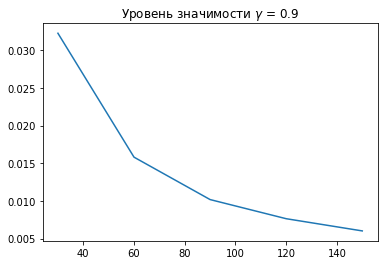

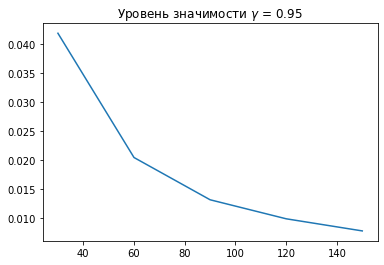

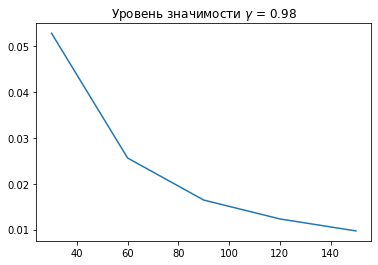

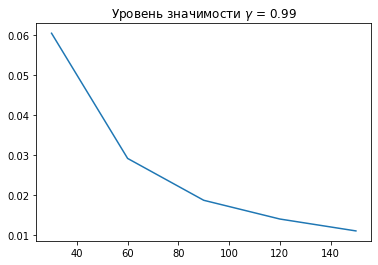

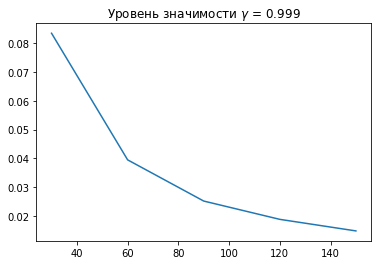

In [87]:
for j in range(len(gamma)): 
    plt.title(f'Уровень значимости $\gamma$ = {gamma[j]}')
    plt.plot(n_value, [all_delta[i][j] for i in range(len(n_value))])
    plt.show()

![Picture for task](https://sun9-69.userapi.com/c857228/v857228183/1b40d3/gr74lNRtxvE.jpg)

__Задание 2.__ Доверительный интервал для дисперсии СВ.

_2.1. В соответствии с вариантом (см. задание 1) сформировать выборку из 20 случайных чисел. Найти точечную оценку дисперсии случайной величины._

Формула несмещенной оценки дисперсии:

$$S^2_0=\frac{1}{n-1}\sum_{i=0}^{n}(x_i-\bar{x})^2$$

In [88]:
n = 20

# формируем выборку
x = sorted([random.uniform(a,b) for i in range(n)])
y = sorted([math.sqrt(value) for value in x])

# находим точечную оценку математического ожидания СВ - mY
mY = sum(y) / n

# находим точечную несмещенную оценку дисперсии СВ - Dx
S = sum([(y[i] - mY)**2  for i in range(n)]) / (n - 1)
print("Точечная оценка дисперсии СВ y: ", S)

Точечная оценка дисперсии СВ y:  0.14604709993210988


_2.2. Найти точечную оценку математического ожидания случайной величины._

Формула несмещенной оценки мат. ожидания:

$$\bar{x}=\sum_{i=0}^{n}\frac{x_i}{n}$$

In [89]:
print("Точечная оценка мат. ожидания СВ y: ", mY)

Точечная оценка мат. ожидания СВ y:  1.6950384212457625


_2.3. Найти доверительный интервал для оценки дисперсии случайной величины для различных уровней значимости._

Уровни значимости $\gamma$: 0.9, 0.95, 0.98, 0.99, 0.999. Кол-во степеней свободы: $n-1=19$. По таблице Хи-квадрат определяем значения $\chi^2_{\frac{1-\gamma}{2}, n-1}$ и $\chi^2_{\frac{1+\gamma}{2}, n-1}$.
    
Доверительный интервал строится по формуле:

$$\frac{n\cdot s^2}{\chi^2_{\frac{1-\gamma}{2}, n-1}}\le D_x <\frac{n\cdot s^2}{\chi^2_{\frac{1+\gamma}{2}, n-1}}$$

In [90]:
from scipy.stats import chi2

In [100]:
delta = []

for i in range(len(gamma)): 
    #считаем хи-квадрат
    chi_1, chi_2 = chi2.ppf((1 + gamma[i]) / 2, n - 1), chi2.ppf((1 - gamma[i]) / 2, n - 1)
    
    #находим границы интервала по формуле
    y1, y2 = n * S / chi_1, n * S / chi_2
    delta.append(y2 - y1)
    print("\nДоверительный интервал для дисперсии с уровнем значимости gamma =", gamma[i], "\n", y1, "< D[y] <", y2)


Доверительный интервал для дисперсии с уровнем значимости gamma = 0.9 
 0.009991150434639336 < D[y] < 0.029768520910397646

Доверительный интервал для дисперсии с уровнем значимости gamma = 0.95 
 0.009167341972756617 < D[y] < 0.03381440045064983

Доверительный интервал для дисперсии с уровнем значимости gamma = 0.98 
 0.00832167124438243 < D[y] < 0.03945751111963961

Доверительный интервал для дисперсии с уровнем значимости gamma = 0.99 
 0.0078058812996965096 < D[y] < 0.04400493446550343

Доверительный интервал для дисперсии с уровнем значимости gamma = 0.999 
 0.006550969736209419 < D[y] < 0.0613085633423561


_2.4. Построить график зависимости величины доверительного интервала от уровня значимости._

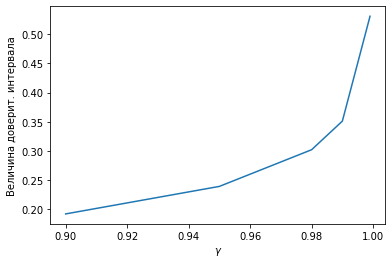

In [92]:
plt.plot(gamma, delta)
plt.xlabel("$\gamma$")
plt.ylabel("Величина доверит. интервала")
plt.show()

_2.5. Найти теоретическое значение математического ожидания случайной величины по известной плотности распределения ( задание 2, п.3)._


Теоретическая функция распределения имеет вид:
$$ F(x) = \begin{cases}
0, x < 0, \\
\frac {x^2}{4} - \frac{1}{4}, x \in [1,\sqrt{5}],\\
1, x > \sqrt{5} \\
\end{cases}
$$
Теоретическая плотность распределения имеет вид:
$$ f(x)= \frac {x}{2}, x \in [1, \sqrt{5}] $$

$$M(X) = \int_{-\infty}^\infty x \cdot f(x)dx = \int_{1}^{ \sqrt{5}}  \frac {x^2}{2} dx = \frac {1}{2}\cdot {{x^3} \over {3}}\bigg|_1^\sqrt{5} $$
<!-- $$M(X^2) = \int_{-\infty}^\infty x^2 \cdot f(x)dx = \int_{1}^{ \sqrt{5}}  \frac {x^3}{2} dx  = \frac {1}{2}\cdot {{x^4} \over {4}}\bigg|_1^\sqrt{5} $$

$$D(X) = M(X^2) - M^2(X)$$ -->

In [93]:
mx = 1 / 2 * ((math.sqrt(5) ** 3 - 1) / 3)
print("Теоретическое значение мат. ожидания", mx)

Теоретическое значение мат. ожидания 1.6967233145831584


_2.6. Найти доверительный интервал для оценки дисперсии случайной величины при известном математическом ожидании для различных уровней значимости._

In [94]:
delta_t = []

for i in range(len(gamma)): 
    chi_1, chi_2 = chi2.ppf((1 + gamma[i]) / 2, n - 1), chi2.ppf((1 - gamma[i]) / 2, n - 1)
    s = sum([(y[i] - mx)**2  for i in range(n)])
    y1, y2 = s / chi_1, s / chi_2
    delta_t.append(y2 - y1)
    print("\nДоверительный интервал для дисперсии с уровнем значимости gamma =", gamma[i], "\n", y1, "< D[y] <", y2)


Доверительный интервал для дисперсии с уровнем значимости gamma = 0.9 
 0.09205796180021965 < D[y] < 0.274285666975582

Доверительный интервал для дисперсии с уровнем значимости gamma = 0.95 
 0.08446743171954282 < D[y] < 0.31156419927287604

Доверительный интервал для дисперсии с уровнем значимости gamma = 0.98 
 0.07667546380578524 < D[y] < 0.3635595395291081

Доверительный интервал для дисперсии с уровнем значимости gamma = 0.99 
 0.07192300098026201 < D[y] < 0.40545927143701527

Доверительный интервал для дисперсии с уровнем значимости gamma = 0.999 
 0.06036030842249364 < D[y] < 0.5648940448969129


_2.7. Построить график зависимости величины доверительного интервала от уровня значимости._

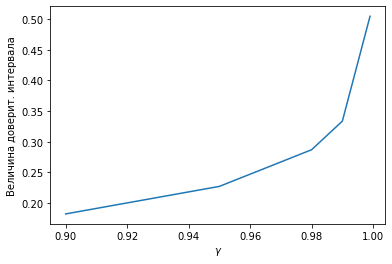

In [95]:
plt.plot(gamma, delta_t)
plt.xlabel("$\gamma$")
plt.ylabel("Величина доверит. интервала")
plt.show()

_2.8. Сравнить результаты, полученные по п.п. 2.4, 2.7._

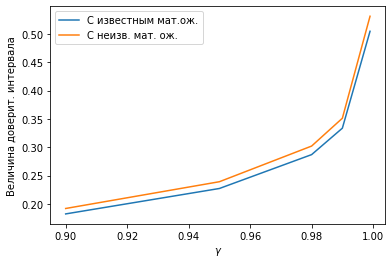

In [96]:
plt.plot(gamma, delta_t, label = "С известным мат.ож.")
plt.plot(gamma, delta, label = "С неизв. мат. ож.")
plt.xlabel("$\gamma$")
plt.ylabel("Величина доверит. интервала")
plt.legend()
plt.show()

_2.9. Повторить п.п. 2.2 – 2.8. для различного объема выборки: n = 30, 50, 70, 100, 150._

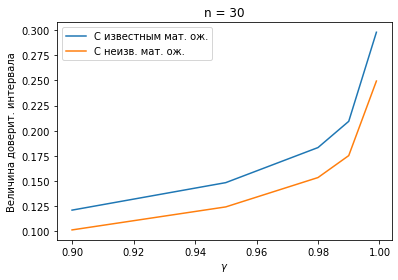

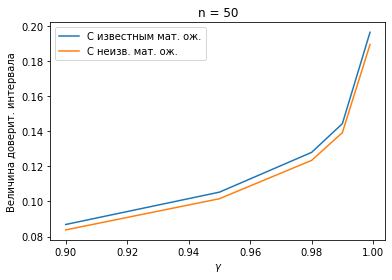

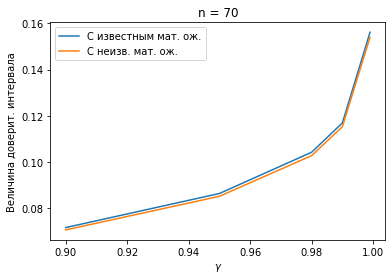

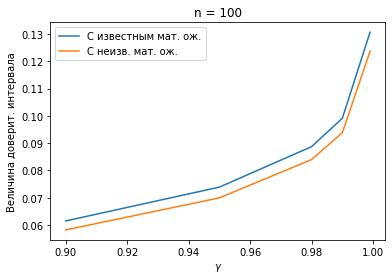

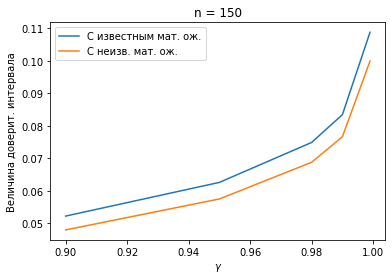

In [97]:
n_value = [30, 50, 70, 100, 150]
all_delta = []

for j in range (len(n_value)):
    #формируем выборку
    x = sorted([random.uniform(a,b) for i in range(n_value[j])])
    y = sorted([math.sqrt(value) for value in x])

    # находим точечную оценку математического ожидания СВ - mY
    mY = sum(y) / n_value[j]
    
    # находим точечную несмещенную оценку дисперсии СВ - Dx
    S = sum([(y[i] - mY)**2  for i in range(n_value[j])]) / (n_value[j] - 1)

    #доверительный интервал с неизв.мат.ож.
    delta = []
    for i in range(len(gamma)):
        chi_1, chi_2 = chi2.ppf((1 + gamma[i]) / 2, n_value[j] - 1), chi2.ppf((1 - gamma[i]) / 2, n_value[j] - 1)
        y1, y2 = n_value[j] * S / chi_1, n_value[j] * S / chi_2
        delta.append(y2 - y1) 
    all_delta.append(delta)
    
    #доверительный интервал с изв.мат.ож.
    delta_t = []
    mx = 0.3 * ((5**2 - 1)/4)
    for i in range(len(gamma)): 
        chi_1, chi_2 = chi2.ppf((1 + gamma[i]) / 2, n_value[j] - 1), chi2.ppf((1 - gamma[i]) / 2, n_value[j] - 1)
        s = sum([(y[k] - mx)**2  for k in range(n_value[j])])
        y1, y2 = s / chi_1,  s / chi_2
        delta_t.append(y2 - y1)
    
    plt.plot(gamma, delta_t, label = "С известным мат. ож.")
    plt.plot(gamma, delta, label = "С неизв. мат. ож.")
    plt.xlabel("$\gamma$")
    plt.ylabel("Величина доверит. интервала")
    plt.title('n = ' + str(n_value[j]))
    plt.legend()
    plt.show()

_2.10. Построить графики зависимости величины доверительного интервала от объема выборки._

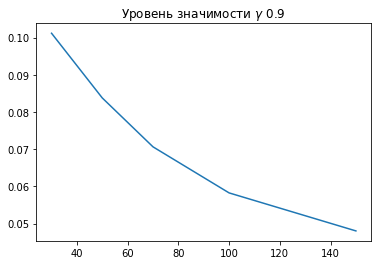

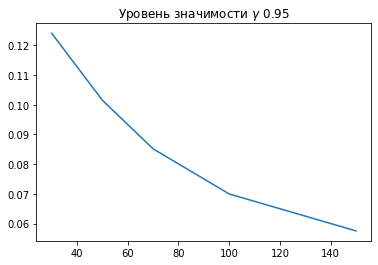

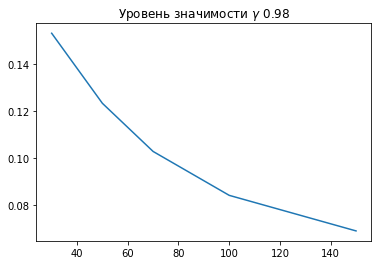

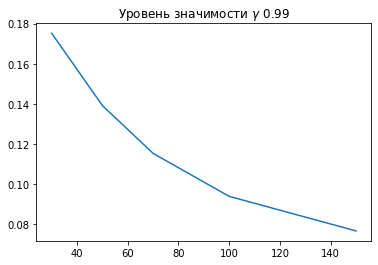

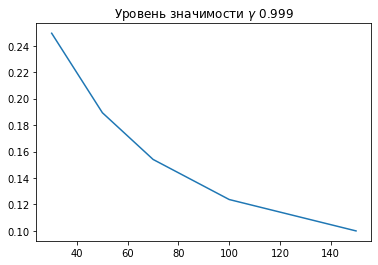

In [99]:
for j in range(len(gamma)): 
    plt.title(f'Уровень значимости $\gamma$ {gamma[j]}')
    plt.plot(n_value, [all_delta[i][j] for i in range(len(n_value))])
    plt.show()